In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

np.random.seed(42)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
data = pd.DataFrame.from_csv("drive/My Drive/data/train_info.tsv", sep="\t")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [0]:
data.head()

,title,artist_name,artist_id,composers_name,composers_id,release_time
ID,,,,,,
1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00
1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00
1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00
1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00
1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 1073748245 to 1078514108
Data columns (total 6 columns):
title             9078 non-null object
artist_name       9078 non-null object
artist_id         9078 non-null object
composers_name    9078 non-null object
composers_id      9078 non-null object
release_time      9078 non-null object
dtypes: object(6)
memory usage: 496.5+ KB


In [0]:
data.describe()

,title,artist_name,artist_id,composers_name,composers_id,release_time
count,9078,9078,9078,9078,9078,9078
unique,6766,2397,2391,2048,2212,3675
top,Đắp Mộ Cuộc Tình,Hoàng Minh Thắng,601427,Nhạc Ngoại Lời Việt,100103,2018-11-14 21:38:00
freq,33,147,147,178,178,26


In [0]:
len(data.artist_name.value_counts())

2397

In [0]:
len(data.artist_id.value_counts())

2391

artist_name > artist_id

In [0]:
data_label = pd.read_csv("drive/My Drive/data/train_rank.csv", sep=",")
data_label.head()

,ID,label
0,1073748245,7
1,1073751978,3
2,1073835561,6
3,1073856553,2
4,1073929630,7


In [0]:
data1 = pd.merge(left=data,right=data_label, left_on='ID', right_on='ID')
data1.head()


,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7


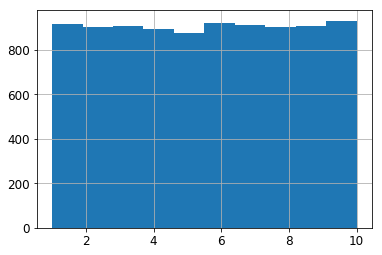

In [0]:
data_label.label.hist()

cac label phan bo deu

In [0]:
data1.drop(columns=['artist_id', 'composers_id'], inplace=True)

In [0]:
data1[data1.artist_name == 'Phan Duy Anh'].label.value_counts()

2     5
4     4
1     4
6     3
5     3
10    2
3     2
Name: label, dtype: int64

In [0]:
top_artists = data1.groupby('artist_name').label.mean().sort_values(ascending=True)

In [0]:
top_artists[200:300]

artist_name
Hoàng Kio                                                  1.000000
Soobin Hoàng Sơn, Hương Tràm, Đức Phúc, ERIK, Hòa Minzy    1.000000
Soobin Hoàng Sơn, Jiyeon                                   1.000000
Soobin Hoàng Sơn, Rhymastic                                1.000000
Suboi                                                      1.000000
Suzie, Phuc.Pin, Búp, KayDee, Sevenk                       1.000000
HuyR, Tùng Viu                                             1.000000
Sơn Ngọc Minh, Huỳnh Lập                                   1.000000
Sơn Tùng M-TP, SlimV                                       1.000000
HuyR, Tuấn Cry                                             1.000000
T-Rex                                                      1.000000
Đức Phúc, Hòa Minzy                                        1.000000
HuyR, Lizay, The Wind                                      1.000000
RHY, Dick                                                  1.000000
Tuấn Hưng                           

so luong artist ko phai 1 nguoi co label 1 la kha nhieu

In [0]:
def viet_thuong(string):
  return string.lower()

In [0]:
data1.artist_name = data1.artist_name.apply(viet_thuong)
data1.composers_name = data1.composers_name.apply(viet_thuong)

In [0]:
def number_of(string):
  return len(string.split(','))

In [0]:
data1['no_artist'] = data1.artist_name.apply(number_of)

In [0]:
data1['no_artist'].value_counts()

1     7418
2     1462
3      132
4       39
5       17
6        5
8        3
12       1
11       1
Name: no_artist, dtype: int64

In [0]:
data1.groupby('no_artist').label.mean()

no_artist
1      5.728363
2      4.699726
3      3.537879
4      3.410256
5      2.176471
6      4.200000
8      3.333333
11    10.000000
12     2.000000
Name: label, dtype: float64

voi so artist tu 1 den 5, cang nhieu artist label cang nho

In [0]:
data1 = data1[data1['no_artist'] < 6]

In [0]:
def number_of_2(string):
  return len(string.split('ft'))

In [0]:
m = data1.artist_name[data1.no_artist == 1].apply(number_of_2)
m[m>1]

2839    2
2930    2
Name: artist_name, dtype: int64

In [0]:
data_1_artist = data1[data1['no_artist'] == 1]

In [0]:
data_1_artist.groupby('artist_name').label.mean().sort_values(ascending=True)

artist_name
khắc hưng               1.0
hải sâm                 1.0
hồ gia huy              1.0
uyên pím (bệt band)     1.0
hồ phong an             1.0
hồ quang ngọc           1.0
jack                    1.0
jun phạm                1.0
junki                   1.0
hạnh sino               1.0
justatee                1.0
kha ken                 1.0
khánh phong             1.0
khởi my                 1.0
kim thành               1.0
kiều thương thương      1.0
cara                    1.0
đạt g                   1.0
tuấn hưng               1.0
kai đinh                1.0
long cao                1.0
vicky nhung             1.0
hoàng kio               1.0
đinh tùng huy           1.0
bảo anh                 1.0
đinh hương              1.0
đen                     1.0
đan nguyên              1.0
dickson                 1.0
diệp thanh phong        1.0
                       ... 
châu ngọc hiếu         10.0
vũ minh vương          10.0
hoàng phương           10.0
đan kim                10.0
cúc vàng

In [0]:
hang_1 = data1['label'] == 1
artist = data1['no_artist'] == 1
data_rank1 = data1[hang_1 & artist]
data_rank1.head()

,ID,title,artist_name,composers_name,release_time,label,no_artist
28,1075033645,Một Nhà,da lab,da lab,2017-09-25 17:02:00,1,1
56,1075810266,Trở Về Đi (Tỉnh Giấc Tôi Thấy Mình Trong Ai OST),chi pu,phạm toàn thắng,2017-09-01 16:15:00,1,1
64,1075810346,Con Đê Chung Tình,phi nhung,phạm hoàng dũng,2017-09-01 17:32:00,1,1
94,1075810896,Người Ta Thuờng Nói,trung quân idol,kai đinh,2017-10-01 19:46:00,1,1
106,1075810944,Phải Có Em,kai đinh,kai đinh,2017-10-01 20:55:00,1,1


top 20 artist loại Cao Nam Thành, Gia Huy

In [0]:
data1.release_time.str.slice(0 ,4).value_counts()

2018    6244
2017    2824
Name: release_time, dtype: int64

In [0]:
data1.head()

,ID,title,artist_name,composers_name,release_time,label,no_artist
0,1073748245,Đêm Chôn Dầu Vượt Biển,như quỳnh,châu đình an,2017-10-01 22:07:00,7,1
1,1073751978,Mùa Thu Trong Mưa,minh tuyết,trường sa,2017-10-01 20:58:00,3,1
2,1073835561,Rồi Ánh Trăng Tan,lưu bích,quốc bảo,2017-11-01 18:16:00,6,1
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,như quỳnh,bắc sơn,2017-11-01 17:36:00,2,1
4,1073929630,Người Điên Biết Yêu,như loan,lê minh kha,2017-11-01 17:49:00,7,1


In [0]:
data1.release_time = pd.to_datetime(data1.release_time)

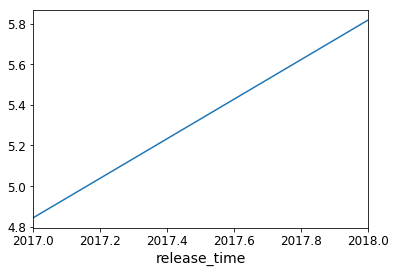

In [0]:
data1.groupby(data1.release_time.dt.year).label.mean().plot()

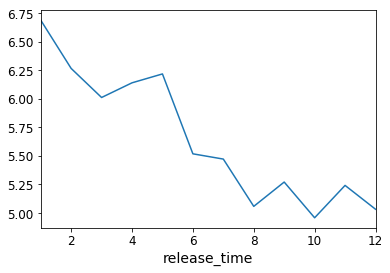

In [0]:
data1.groupby(data1.release_time.dt.month).label.mean().plot()

cang gan thang 12 label cang nho

In [0]:
data1.release_time.dt.month.value_counts()

8     1227
11    1078
10    1022
9      980
12     977
5      718
1      683
7      561
3      538
4      509
6      436
2      339
Name: release_time, dtype: int64

cac thang 8 9 10 11 12 co so luong bai hat duoc release nhieu

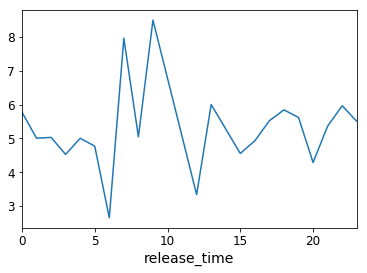

In [0]:
data1.groupby(data1.release_time.dt.hour).label.mean().plot()

In [0]:
data1.release_time.dt.hour.value_counts()

17    1367
18    1243
22    1215
0     1127
23    1092
21    1037
1      615
16     569
19     199
20     183
2      148
3       84
15      49
4       40
5       26
7       26
8       22
6       17
13       4
12       3
9        2
Name: release_time, dtype: int64

tu 17h den 0h release nhieu bai hat, nhung label cua nhung bai hat nay kha lon, luc 6h va 12h co label nho nhung co rat it bai hat duoc release trong khoang thoi gian nay

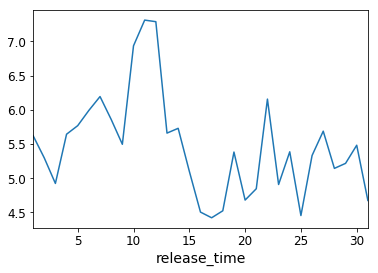

In [0]:
data1.groupby(data1.release_time.dt.day).label.mean().plot()

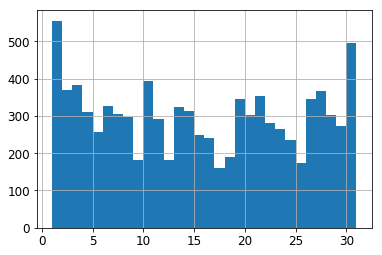

In [0]:
data1.release_time.dt.day.hist(bins = 30)

In [0]:
data1['month'] = data1.release_time.dt.month
data1['year'] = data1.release_time.dt.year

In [0]:
data1.drop(columns=['release_time'], inplace = True)

In [0]:
data1.dtypes

ID                 int64
title             object
artist_name       object
composers_name    object
label              int64
no_artist          int64
month              int64
year               int64
months            object
years             object
dtype: object

In [0]:
data1['months'] = data1.month.apply(str)
data1['years'] = data1.year.apply(str)

In [0]:
data1.drop(columns=['month', 'year'], inplace=True)

In [0]:
data1['no_composer'] = data1.composers_name.apply(number_of)

In [0]:
data1.no_composer.value_counts()

1    8235
2     752
3      70
4      10
7       1
Name: no_composer, dtype: int64

In [0]:
data1.groupby('no_composer').label.mean()

no_composer
1    5.556648
2    5.259309
3    3.371429
4    4.700000
7    4.000000
Name: label, dtype: float64

so luong composer tang label giam, so composer la 4 va 7 la ko nhieu

In [0]:
data1 = data1[data1['no_artist'] < 4]

In [0]:
data1.head()

,ID,title,artist_name,composers_name,label,no_artist,months,years,no_composer
0,1073748245,Đêm Chôn Dầu Vượt Biển,như quỳnh,châu đình an,7,1,10,2017,1
1,1073751978,Mùa Thu Trong Mưa,minh tuyết,trường sa,3,1,10,2017,1
2,1073835561,Rồi Ánh Trăng Tan,lưu bích,quốc bảo,6,1,11,2017,1
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,như quỳnh,bắc sơn,2,1,11,2017,1
4,1073929630,Người Điên Biết Yêu,như loan,lê minh kha,7,1,11,2017,1
